In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [77]:
data=pd.read_csv("/content/titanic_train.csv")

In [78]:
data.shape

(891, 12)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [80]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [81]:
import seaborn as sns

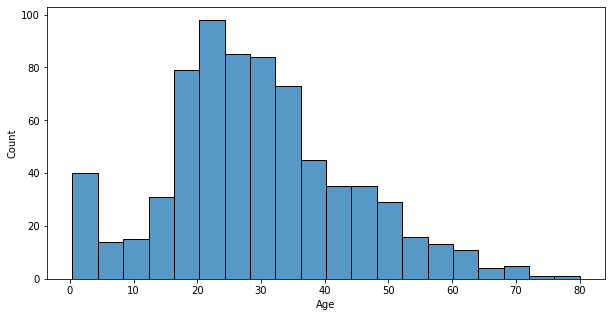

In [82]:
plt.figure(figsize=(10,5))
sns.histplot(data['Age'])
plt.show()

In [83]:
data['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [84]:
data=data.drop(columns='Cabin',axis=1)

In [85]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [86]:
data=data.dropna()

In [87]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [88]:
data.shape

(712, 11)

In [89]:
data.Sex.value_counts()

male      453
female    259
Name: Sex, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


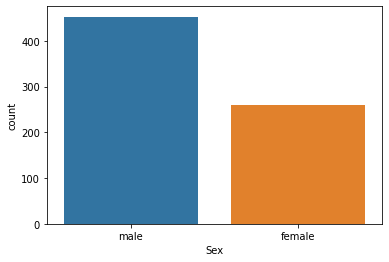

In [90]:
sns.countplot(data.Sex)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


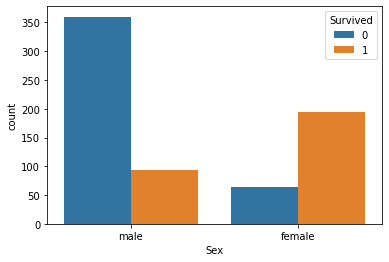

In [91]:
sns.countplot('Sex',hue='Survived',data=data)

In [92]:
data.replace({'Sex':{'male': 1,'female': 1}},inplace=True)

In [93]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [94]:
data.Survived.value_counts()

0    424
1    288
Name: Survived, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


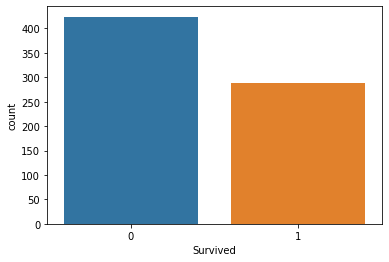

In [95]:
sns.countplot(data.Survived)

In [96]:
data.Pclass.value_counts()

3    355
1    184
2    173
Name: Pclass, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


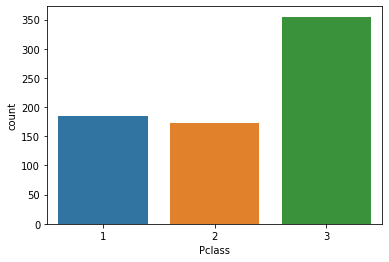

In [97]:
sns.countplot(data.Pclass)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


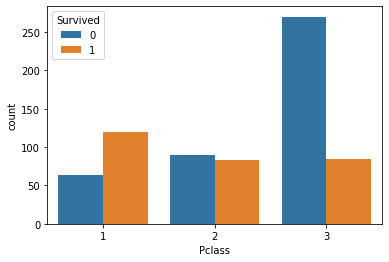

In [98]:
sns.countplot('Pclass',hue='Survived',data=data)

In [99]:
data.SibSp.value_counts()

0    469
1    183
2     25
4     18
3     12
5      5
Name: SibSp, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


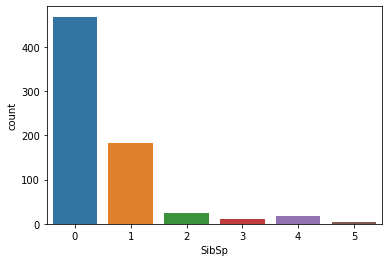

In [100]:
sns.countplot(data.SibSp)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


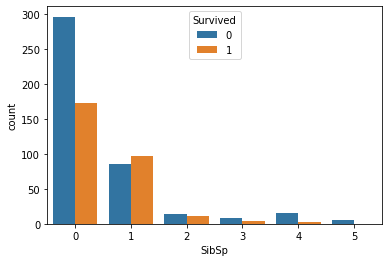

In [101]:
sns.countplot('SibSp',hue='Survived',data=data)

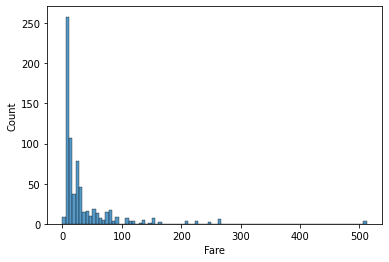

In [102]:
sns.histplot(data.Fare)

In [103]:
data.Embarked.value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


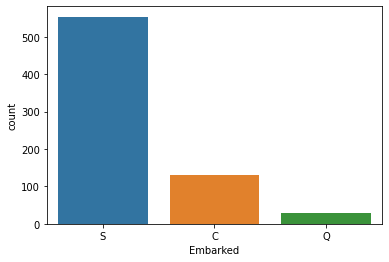

In [104]:
sns.countplot(data.Embarked)

In [105]:
data.replace({'Embarked':{'S':1,'C':2,'Q':3}},inplace=True)

In [106]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1


In [107]:
x = data.drop(columns=['Name','Ticket','PassengerId','Survived'],axis=1)
y=data['Survived']

In [108]:
print(x)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    1  22.0      1      0   7.2500         1
1         1    1  38.0      1      0  71.2833         2
2         3    1  26.0      0      0   7.9250         1
3         1    1  35.0      1      0  53.1000         1
4         3    1  35.0      0      0   8.0500         1
..      ...  ...   ...    ...    ...      ...       ...
885       3    1  39.0      0      5  29.1250         3
886       2    1  27.0      0      0  13.0000         1
887       1    1  19.0      0      0  30.0000         1
889       1    1  26.0      0      0  30.0000         2
890       3    1  32.0      0      0   7.7500         3

[712 rows x 7 columns]


In [109]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64


In [110]:
model=LogisticRegression()

In [111]:
model.fit(x,y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [112]:
train_data_predict = model.predict(x)

In [113]:
print(train_data_predict)

[0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1
 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1
 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1
 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1
 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0
 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1
 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1
 0 0 1 0 0 1 0 0 1 0 0 0 

In [114]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64


In [115]:
train_accuracy=accuracy_score(train_data_predict,y)

In [116]:
print(train_accuracy)

0.7078651685393258


In [117]:
test_data=pd.read_csv("/content/titanic_test.csv")

In [118]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [119]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [120]:
test_data=test_data.drop(columns='Cabin',axis=1)

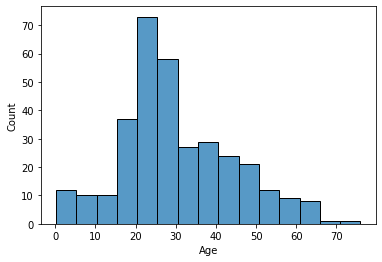

In [121]:
sns.histplot(test_data.Age)

In [122]:
test_data.Age.mean()

30.272590361445783

In [123]:
test_data.fillna(test_data.Age.mean(),inplace=True)

In [124]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [125]:
test_data.replace({'Embarked':{'S':1,'C':2,'Q':3}},inplace=True)

In [126]:
test_data.replace({'Sex':{'male': 1,'female': 1}},inplace=True)

In [127]:
x_test=test_data.drop(columns=['Name','PassengerId','Ticket'],axis=1)

In [128]:
print(x_test)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    1  34.50000      0      0    7.8292         3
1         3    1  47.00000      1      0    7.0000         1
2         2    1  62.00000      0      0    9.6875         3
3         3    1  27.00000      0      0    8.6625         1
4         3    1  22.00000      1      1   12.2875         1
..      ...  ...       ...    ...    ...       ...       ...
413       3    1  30.27259      0      0    8.0500         1
414       1    1  39.00000      0      0  108.9000         2
415       3    1  38.50000      0      0    7.2500         1
416       3    1  30.27259      0      0    8.0500         1
417       3    1  30.27259      1      1   22.3583         2

[418 rows x 7 columns]


In [129]:
train_data_predict = model.predict(x_test)

In [130]:
print(train_data_predict)

[0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1
 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0
 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1
 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0
 1 0 0 0 1 0 0 1 0 0 0]


In [134]:
test_data['Prediction'] = train_data_predict

In [135]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Prediction
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,3,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,1,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,3,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,1,0


In [138]:
test_data['Prediction'].value_counts()

0    287
1    131
Name: Prediction, dtype: int64

In [139]:
test_data.to_csv("titanic_prediction.csv")